# Problem Set 1

### Problem 1:

In [1]:
# Solve for the steady-state in 3-per OG model

# Import libraries
import numpy as np
import scipy.optimize as opt 

# Household Parameters
S = int(3) # three periods
yrs_live = 60 # years per period
sigma = 3 # risk aversion
beta_annual = 0.96
beta = beta_annual **(yrs_live / S) # period beta
v_n = np.array([1, 1, 0.2]) #labor endowment

# Firm Parameters
alpha = 0.35 # capital share
A = 1 # technology
delta_annual = 0.05 # annual depreciation
delta = 1 - (1 - delta_annual) ** (yrs_live / S) # period depreciation

def MU(c):
    """ Marginal Utility"""
    return c ** (- sigma) 

def get_r(K, L = sum(v_n)):
    r = alpha * A *((L / K) ** (1 - alpha)) - delta
    return r

def get_w(K, L = sum(v_n)):
        w = (1 - alpha) * A * ((K / L) ** (alpha))
        return w
    
def get_c(v_b, v_k):
    # first period
    w1 = get_w(v_k[0])
    c1 = w1 - v_b[0]
    #second period
    w2 = get_w(v_k[1])
    r2 = get_r(v_k[1])
    c2 = w2 + (1 + r2)*v_b[0] - v_b[1]
    # third period
    w3 = get_w(v_k[2])
    r3 = get_r(v_k[2])
    c3 = 0.2*w3 + (1 + r3)*v_b[1]
    c = np.array([c1, c2, c3])
    return c
    
def diffeq(v_b):
    # the system of equations ( = 0 for the steady state)
        v_k = np.ones((3))* sum(v_b)
        c = get_c(v_b, v_k)
        r2 = get_r(v_k[1])
        diff1 = MU(c[0]) - beta*(1 + r2)*MU(c[1])
        r3 = get_r(v_k[2])
        diff2 = MU(c[1]) - beta*(1 + r3)*MU(c[2])
        diff = np.array([diff1, diff2])
        return diff
"""   
def diffeq2(v_b):
    # the system of equations ( = 0 for the steady state)
        v_k = np.ones((3))* sum(v_b)
        k = sum(v_b)
        c = get_c(v_b, v_k)
        r = get_r(k)
        diff1 = MU(c[0]) - beta*(1 + r)*MU(c[1])
        diff2 = MU(c[1]) - beta*(1 + r)*MU(c[2])
        diff = np.array([diff1, diff2])
        return diff 
""" 
def steadystate(initguess):
    ss = opt.root(diffeq,initguess)
    return ss

def ssdisplay(ss):
    b2ss, b3ss = ss.x
    kss = b2ss + b3ss
    rss = get_r(kss, L = sum(v_n))
    wss = get_w(kss, L = sum(v_n))
    c1ss, c2ss, c3ss = get_c(ss.x, np.ones((3)) * kss)
    vec = [b2ss, b3ss, c1ss, c2ss, c3ss, rss, wss]
    names = ["b2ss", "b3ss", "c1ss", "c2ss", "c3ss", "rss", "wss"]
    for i in range(len(names)):
        print("The value of " + names[i] +  " is: " + str(vec[i]))
    return


In [2]:
ss = steadystate([0.1, 0.1])
ssdisplay(ss)

The value of b2ss is: 0.0193127352392
The value of b3ss is: 0.058411590879
The value of c1ss is: 0.182412558356
The value of c2ss is: 0.209614907072
The value of c3ss is: 0.240873817365
The value of rss is: 2.43303025356
The value of wss is: 0.201725293596


### Problem 2: 

In [3]:
beta = 0.55
ss = steadystate([0.1, 0.1])
ssdisplay(ss)

The value of b2ss is: 0.028176959268
The value of b3ss is: 0.0768655662396
The value of c1ss is: 0.195975352642
The value of c2ss is: 0.228615593799
The value of c3ss is: 0.266692158088
The value of rss is: 1.88635999915
The value of wss is: 0.22415231191


We can see from direct comparison that wages, consumption, and savings rise in each period; R falls. That consumption in latter periods and savings rise is immediately intuitive, since a higher beta indicates higher patience for consumption. 
The rise in wage is significant because it is directly tied to the savings, which rise. This higher steady-state wage even allows the agent to consume more in period 1.


### Problem 3:

In [4]:
# Solve for the steady-state in 3-per OG model

# Import libraries
import numpy as np
import scipy.optimize as opt 

# Household Parameters
S = int(3) # three periods
yrs_live = 60 # years per period
sigma = 3 # risk aversion
beta_annual = 0.96
beta = beta_annual **(yrs_live / S) # period beta
v_n = np.array([1, 1, 0.2]) #labor endowment

# Firm Parameters
alpha = 0.35 # capital share
A = 1 # technology
delta_annual = 0.05 # annual depreciation
delta = 1 - (1 - delta_annual) ** (yrs_live / S) # period depreciation


def MU(c):
    """ Marginal Utility"""
    return c ** (- sigma) 

def get_r(K, L = sum(v_n)):
    r = alpha * A *((L / K) ** (1 - alpha)) - delta
    return r

def get_w(K, L = sum(v_n)):
        w = (1 - alpha) * A * ((K / L) ** (alpha))
        return w
    
def get_c(v_b, v_k):
    # first period
    w1 = get_w(v_k[0])
    c1 = w1 - v_b[0]
    #second period
    w2 = get_w(v_k[1])
    r2 = get_r(v_k[1])
    c2 = w2 + (1 + r2)*v_b[0] - v_b[1]
    # third period
    w3 = get_w(v_k[2])
    r3 = get_r(v_k[2])
    c3 = 0.2*w3 + (1 + r3)*v_b[1]
    c = np.array([c1, c2, c3])
    return c

T = int(round(8 * S))

# Steady state from (a)

b2ss = 0.0193127352392
b3ss = 0.058411590879
rss = 2.43303025356
wss = 0.201725293596
kss = b2ss + b3ss

# Initial conditions
b2_1 = 0.8*b2ss
b3_1 = 1.1*b3ss
k1 = b2_1 + b3_1

k_guess = [k1]
for i in range(T + 4):
    if i < T:
        k_guess.append(k1 +((i)/ (T-1))*(kss - k1))
    else:
        k_guess.append(kss)


    


In [5]:
## Solve for the first new path given the rates from initial guess
# Initialize the r and w vectors for the time path guess
"""
r = []
w = []
for i in range(T+6):
    if i < T + 1:
        r.append(get_r(k_guess[i]))
        w.append(get_w(k_guess[i])) 
    else: 
        r.append(rss)
        w.append(wss)
"""
# paths for b2 and b3
b2path = np.zeros((T+5))
b3path = np.zeros((T+5))
b2path[0] = b2_1
b3path[0] = b3_1
for i in range(5):
        b2path[T + i] = b2ss
        b3path[T + i] = b3ss

def b3error(b3, b2 = b2_1 , v_k = k_guess[0:3]):
    v_b = np.array([b2,b3])
    c = get_c(v_b, v_k)
    r2 = get_r(v_k[1])
    r3 = get_r(v_k[2])
    diff3 = MU(c[1]) - beta*(1 + r3)*MU(c[2])
    return diff3

def b3givenb2(b2 = b2_1, b3guess = 0.1, v_k = k_guess[0:3]):
    b = b3guess
    b3 = opt.root(b3error, b3guess, b2_1)
    return b3.x

def diffeq2(v_b, v_k):
    # the system of equations 
        c = get_c(v_b, v_k)
        r2 = get_r(v_k[1])
        diff1 = MU(c[0]) - beta*(1 + r2)*MU(c[1])
        r3 = get_r(v_k[2])
        diff2 = MU(c[1]) - beta*(1 + r3)*MU(c[2])
        diff = np.array([diff1, diff2])
        return diff

# Step 3 - Calculate {b2,b3}_{t=1}^{T} given the guess, and sum them to newK (path)
def get_path(b2_1, b3_1, k_old):
    b2path = np.zeros((T+5))
    b3path = np.zeros((T+5))
    b2path[0] = b2_1
    b3path[0] = b3_1
    for i in range(5):
        b2path[T + i] = b2ss
        b3path[T + i] = b3ss
    b3path[1] = b3givenb2(b2 = b2_1, b3guess = 0.1, v_k = k_old[0:3])
        
    i = 1
    while i <= T-1:
        b2b3i = opt.root(diffeq2, np.array([b2ss,b3ss]), k_old[i:i+3])
        if i <= T-2:
            b2path[i], b3path[i+1] = b2b3i.x #['x']
        else:
            b2path[i] = b2b3i.x[0]
        i += 1
    newK = (b2path+b3path)
    return newK
newK = get_path(b2_1, b3_1, k_guess)

On to the time path iteration...

In [6]:
# TPI Parameters
T = int(round(8 * S))
TPI_solve = True
TPI_tol = 1e-9
maxiter_TPI = 200
mindist_TPI = 1e-9
xi = 0.99
TPI_graphs = True
TPI_dist = 1
def dist(path0, path1):
    return sum((100*((path1 - path0)/path0))**2)
print(dist(k_guess, newK))
iteration = 1
while (TPI_dist > TPI_tol) and (maxiter_TPI > iteration):
    k_guess = (1 - xi)*np.array(k_guess) + xi*np.array(newK)
    newK = get_path(b2_1, b3_1, k_guess)
    TPI_dist = dist(k_guess, newK)
    iteration += 1
    print(iteration)
print(newK)


46.2615175983
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
[ 0.07970294  0.07413338  0.07663967  0.07740078  0.07762818  0.07769579
  0.07771586  0.07772182  0.07772358  0.07772411  0.07772426  0.07772431
  0.07772433  0.07772433  0.07772433  0.07772433  0.07772433  0.07772433
  0.07772433  0.07772433  0.07772433  0.07772433  0.07772433  0.07772433
  0.07772433  0.07772433  0.07772433  0.07772433  0.07772433]


### Problem 4

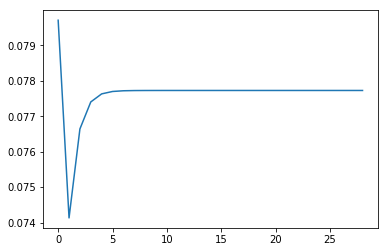

In [7]:
import matplotlib.pyplot #as plt
matplotlib.pyplot.plot(newK)
matplotlib.pyplot.show()
